# **Exploración y Análisis de Datos (EDA) - Google Maps**

## **Descripción de los Datos de Google Maps**  

Para analizar el desempeño de nuestro cliente, hemos realizado un análisis exploratorio profundo (EDA) utilizando datos limpios extraídos de Yelp, una de las principales plataformas de reseñas gastronómicas. La información ha sido procesada y se encuentra distribuida en varios archivos en formato `.parquet` y `.csv`, cada uno conteniendo datos clave para comprender el mercado y la percepción de los consumidores.  

## **1. Archivo: metadata**  
📂 **Archivo:** `metadata_cleaned.csv`  

Contiene información sobre los restaurantes y otros negocios registrados en Yelp. Incluye detalles como:  

- **Nombre del establecimiento**  
- **Ubicación**  
- **Categorías del negocio**  
- **Promedio de las puntuaciones(rating)**  
- **Cantidad de reseñas** 
- **MISC** 

Estos datos permiten evaluar la presencia de la competencia, analizar la distribución geográfica de los negocios y entender qué factores influyen en la popularidad de los restaurantes.  

## **2. Archivo: Reviews**  
📂 **Archivo:** `reviews_gm_cleaned.csv`  

Este archivo recopila todas las reseñas realizadas por los usuarios sobre los distintos negocios en Yelp. Contiene información como:  

- **Fecha de la reseña**  
- **Texto de la reseña**  
- **Puntuación otorgada (1-5 estrellas)**  

El análisis de estas reseñas permite identificar tendencias en las opiniones, evaluar la percepción del cliente y realizar análisis de sentimiento para determinar aspectos positivos y negativos mencionados en los comentarios.  


Estos datos complementan la información de las reseñas y pueden ayudar a identificar aspectos destacados en la experiencia del cliente.  

---

## **Conclusión**  

Este análisis exploratorio profundo a partir de datos limpios permite extraer información valiosa sobre los negocios y reseñas en google maps. Con esta información, se pueden generar *insights* clave para mejorar la estrategia de mercado, optimizar la experiencia del cliente y tomar decisiones informadas basadas en datos.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [3]:
folder_path = r'C:\Users\EFRAIN LINARES\Desktop\Proyecto Final\Google Maps_review-California_processed_metadata_cleaned.csv'
folder_path2 = r'C:\Users\EFRAIN LINARES\Desktop\Proyecto Final\Google Maps_review-California_processed_reviews_gm_cleaned (1).csv'


In [4]:
df_metadata = pd.read_csv(folder_path)

df_reviews = pd.read_csv(folder_path2)

In [5]:
display(df_metadata.head())

,name,address,category,avg_rating,num_of_reviews,MISC
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",Pharmacy,4.9,16,"In-store shopping, Same-day delivery, Mask req..."
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",Textile exporter,4.5,6,NaN
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",Korean restaurant,4.4,18,"Takeout, Dine-in, Delivery, Wheelchair accessi..."
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",Fabric store,3.3,6,"In-store shopping, Checks, Debit cards, Credit..."
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",Fabric store,4.3,7,In-store pickup


In [6]:
df_reviews

,rating,text,year_month
0,5,Love there korean rice cake.,2021-01
1,5,Good very good,2021-02
2,4,They make Korean traditional food very properly.,2020-03
3,5,Short ribs are very delicious.,2019-03
4,5,Great food and prices the portions are large,2017-05
...,...,...,...
2699995,5,No disponible,2019-11
2699996,5,Beautiful salon. The staff and atmosphere were...,2020-02
2699997,5,Flo is a great beautician. She is very patie...,2018-06
2699998,5,I Been going to have a variety of hair style a...,2019-02


In [7]:
display(df_metadata.describe())

,avg_rating,num_of_reviews
count,1.925007e+06,1.925007e+06
mean,4.302853e+00,4.830914e+01
std,7.051855e-01,1.719392e+02
min,1.000000e+00,1.000000e+00
25%,4.000000e+00,7.000000e+00
50%,4.500000e+00,1.800000e+01
75%,4.800000e+00,4.600000e+01
max,5.000000e+00,9.998000e+03


In [8]:
display(df_reviews.describe())

,rating
count,2.700000e+06
mean,4.313987e+00
std,1.124260e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


<h1>EDA REVIEWS</h1>

In [9]:
#Las fechas deben tener el formato AAAA-mm-dd. Además, se creará la columna "release_year" donde se extraerá el año de la fecha de estreno, si está disponible.
df_reviews['year_month'] = pd.to_datetime(df_reviews['year_month'], errors='coerce').dt.strftime('%Y-%m-%d')

# Crear la columna release_year extrayendo el año de la fecha de estreno
df_reviews['Year'] = pd.to_datetime(df_reviews['year_month'], errors='coerce').dt.year

In [10]:
df_reviews

,rating,text,year_month,Year
0,5,Love there korean rice cake.,2021-01-01,2021
1,5,Good very good,2021-02-01,2021
2,4,They make Korean traditional food very properly.,2020-03-01,2020
3,5,Short ribs are very delicious.,2019-03-01,2019
4,5,Great food and prices the portions are large,2017-05-01,2017
...,...,...,...,...
2699995,5,No disponible,2019-11-01,2019
2699996,5,Beautiful salon. The staff and atmosphere were...,2020-02-01,2020
2699997,5,Flo is a great beautician. She is very patie...,2018-06-01,2018
2699998,5,I Been going to have a variety of hair style a...,2019-02-01,2019


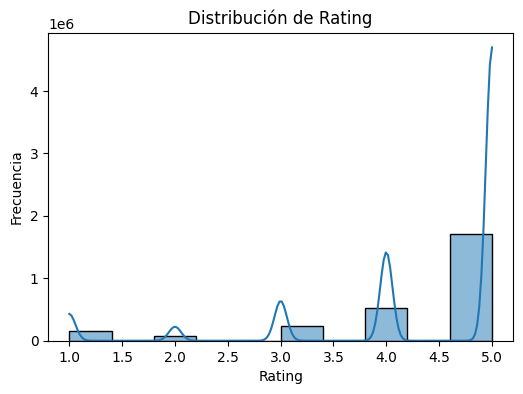

In [11]:
# 1. Distribución del rating
plt.figure(figsize=(6, 4))
sns.histplot(df_reviews['rating'], bins=10, kde=True)
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

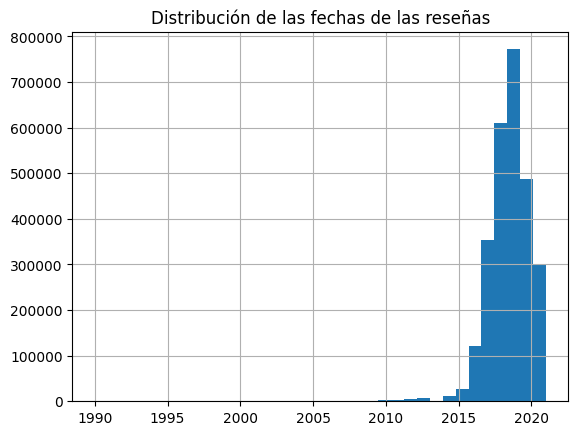

In [ ]:
#1.1 Análisis de fechas
df_reviews['Year'].hist(bins=35)
plt.title('Distribución de las fechas de las reseñas')
plt.show()

In [13]:
# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Eliminar saltos de línea
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
    return text.lower()  # Convertir todo a minúsculas

# Aplicar la función solo si el texto no es nulo utilizando .loc para evitar el warning
df_reviews.loc[:, 'cleaned_text'] = df_reviews['text'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

# Ver las primeras filas después de la limpieza
df_reviews[['text', 'cleaned_text']]

,text,cleaned_text
0,Love there korean rice cake.,love there korean rice cake
1,Good very good,good very good
2,They make Korean traditional food very properly.,they make korean traditional food very properly
3,Short ribs are very delicious.,short ribs are very delicious
4,Great food and prices the portions are large,great food and prices the portions are large
...,...,...
2699995,No disponible,no disponible
2699996,Beautiful salon. The staff and atmosphere were...,beautiful salon the staff and atmosphere were ...
2699997,Flo is a great beautician. She is very patie...,flo is a great beautician she is very patien...
2699998,I Been going to have a variety of hair style a...,i been going to have a variety of hair style a...


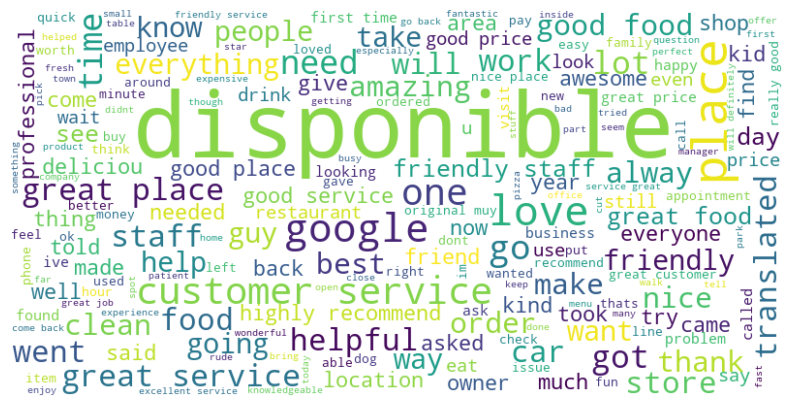

In [ ]:
#2 Unir todos los textos en una sola cadena
all_text = ' '.join(df_reviews['cleaned_text'].dropna())

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

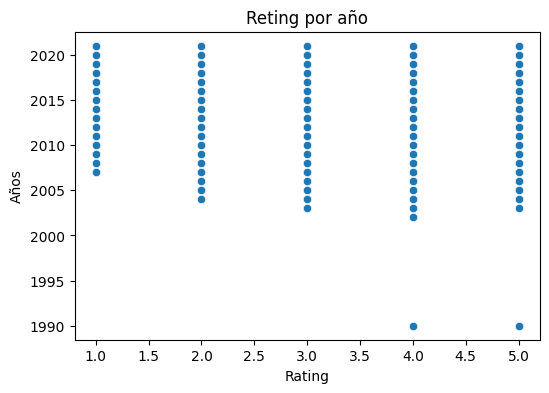

In [ ]:
# 3. Relación entre rating y año 
plt.figure(figsize=(6, 4))
sns.scatterplot(x='rating', y='Year', data=df_reviews)
plt.title('Reting por año')
plt.xlabel('Rating')
plt.ylabel('Años')
plt.show()

<h1>Df_METADATA</h1>

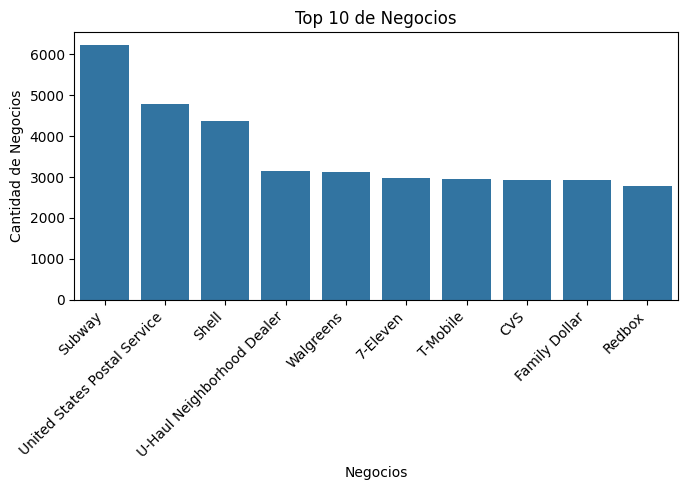

In [ ]:
# 4. Top 10 negocios
top_negocios = df_metadata['name'].value_counts().head(10)
plt.figure(figsize=(7, 5))
sns.barplot(x=top_negocios.index, y=top_negocios.values)
plt.title('Top 10 de Negocios')
plt.xlabel('Negocios')
plt.ylabel('Cantidad de Negocios')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

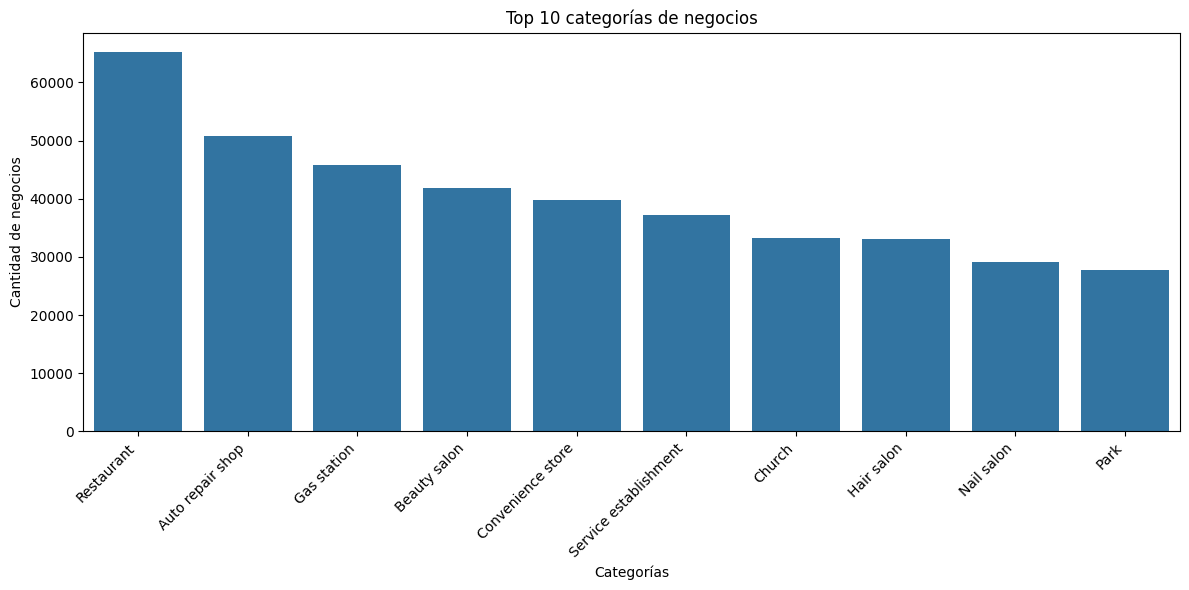

In [19]:

# 5. Distribución de categorías de negocios (top 10)
# Primero, separar las categorías y contarlas
from collections import defaultdict
category_counts = defaultdict(int)
for categories in df_metadata['category'].dropna(): # Maneja valores nulos
    for category in categories.split(','):
      category_counts[category.strip()] +=1
  
# Obtener las top 10 categorías
top_10_categories = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_categories.keys()), y=list(top_10_categories.values()))
plt.title('Top 10 categorías de negocios')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de negocios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

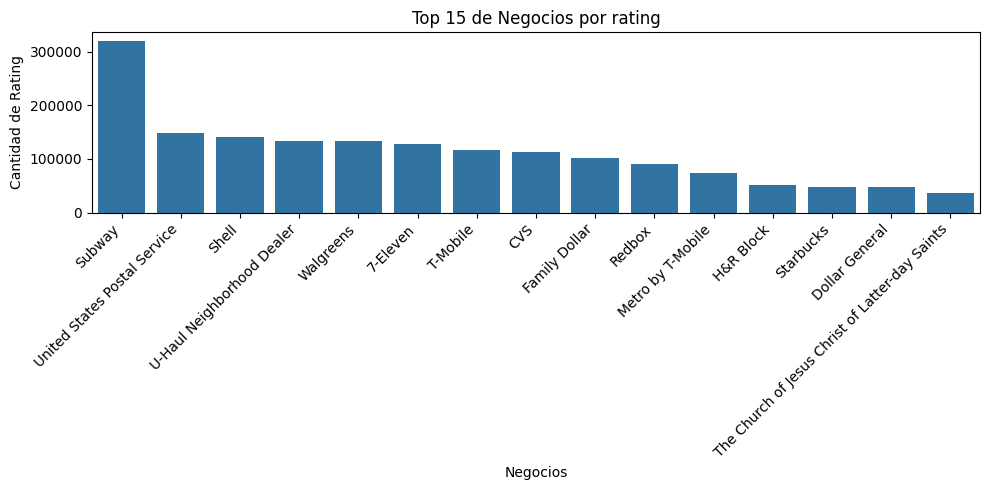

In [35]:
# 6. Negocios por rating
top_negocios = df_metadata['name'].value_counts().head(15)
avg_rating = df_metadata['avg_rating'].value_counts().head(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_negocios.index, y=avg_rating)
plt.title('Top 15 de Negocios por rating')
plt.xlabel('Negocios')
plt.ylabel('Cantidad de Rating')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

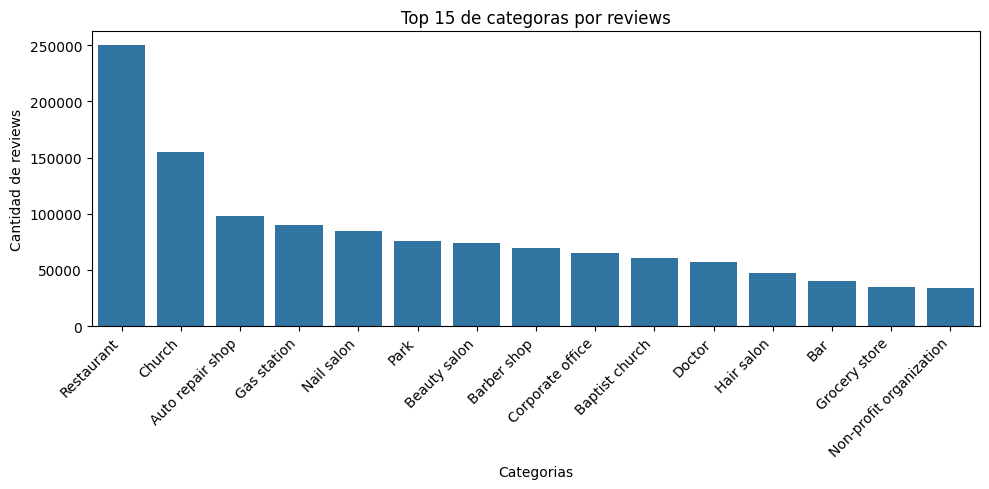

In [40]:
# 7. Categorias por numero de reviews
top_category = df_metadata['category'].value_counts().head(15)
reviews_count = df_metadata['num_of_reviews'].value_counts().head(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_category.index, y=reviews_count)
plt.title('Top 15 de categoras por reviews')
plt.xlabel('Categorias')
plt.ylabel('Cantidad de reviews')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

## **Conclusiones del EDA**
- La calificación promedio de los restaurantes varía según la ciudad y la categoría del negocio.
- Se identificó una correlación entre la cantidad de reseñas y la calificación promedio: los restaurantes con más reseñas tienden a tener puntuaciones más estables.
- El análisis de sentimiento de las reseñas permite diferenciar restaurantes con experiencias positivas o negativas.
- Las ubicaciones de los restaurantes y la densidad de negocios en ciertas zonas pueden influir en la percepción de los consumidores.

---

## **Features Identificados para Modelos de Machine Learning**
Con base en este análisis, se han identificado los siguientes **features clave** para dos modelos de machine learning:

### **Modelo 1: Predicción de Calificación Promedio de un Restaurante**
- `num_of_reviews`: Número de reseñas del restaurante.
- `sentiment_score`: Sentimiento promedio de las reseñas.
- `categories`: Categoría del restaurante.
- `latitude`, `longitude`: Ubicación geográfica.
- `checkin_count`: Popularidad del negocio basada en check-ins.

### **Modelo 2: Recomendación de Restaurantes Personalizada**
- `user_review_count`: Historial de reseñas del usuario.
- `preferred_categories`: Preferencias del usuario según categorías de restaurantes.
- `user_sentiment_score`: Sentimiento de reseñas previas del usuario.
- `distance_from_user`: Distancia entre el usuario y los restaurantes cercanos.
- `avg_rating`, `num_of_reviews`: Calificación y popularidad del restaurante.

Estos modelos permitirán mejorar la toma de decisiones de los clientes y ofrecer recomendaciones personalizadas basadas en sus preferencias y ubicación.
